In [3]:
import pandas as pd

df = pd.read_csv("data.csv",sep="\t",header=None,names=["userID", "movieID", "rating", "timestamp"])

df.head()

,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
ratings = pd.read_csv("data.csv",sep="\t",header=None,names=["userID", "movieID", "rating", "timestamp"])

ratings.head()


,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
users = pd.read_csv("user.csv",sep="|",header=None,names=["userID", "age", "gender", "occupation", "zip"])

users = users[["userID", "gender"]]
users.head()


,userID,gender
0,1,M
1,2,F
2,3,M
3,4,M
4,5,F


In [13]:
genres = pd.read_csv("genre.csv",sep="|",header=None,names=["genreName", "genreID", "flag"])

genres = genres[["genreID", "genreName"]]
genres["genreID"] = genres["genreID"].astype(int)
genres.head()

,genreID,genreName
0,0,unknown
1,1,Action
2,2,Adventure
3,3,Animation
4,4,Children's


In [9]:
movie_genres = pd.read_csv("movie_genres.csv",sep=",",header=None,names=["movieID", "genreID"])

movie_genres.head()


,movieID,genreID
0,movieId,genreId
1,1,2
2,1,3
3,1,4
4,2,1


In [21]:
genres = genres[["genreID","genreName"]]
genres.head()

,genreID,genreName
0,0,unknown
1,1,Action
2,2,Adventure
3,3,Animation
4,4,Children's


In [15]:
print(len(ratings),len(users),len(genres),len(movie_genres))


100000 943 19 2895


In [17]:
print(ratings.columns)
print(movie_genres.columns)

print(ratings["movieID"].dtype)
print(movie_genres["movieID"].dtype)


Index(['userID', 'movieID', 'rating', 'timestamp'], dtype='object')
Index(['movieID', 'genreID'], dtype='object')
int64
object


In [19]:
import pandas as pd

movie_genres["movieID"] = pd.to_numeric(movie_genres["movieID"],errors="coerce")
movie_genres["genreID"] = pd.to_numeric(movie_genres["genreID"],errors="coerce")

movie_genres = movie_genres.dropna(subset=["movieID", "genreID"])
movie_genres = movie_genres.astype({"movieID": int, "genreID": int})

print(movie_genres.dtypes)
movie_genres.head()


movieID    int64
genreID    int64
dtype: object


,movieID,genreID
1,1,2
2,1,3
3,1,4
4,2,1
5,2,2


In [20]:
df = ratings.merge(users,on="userID")
df = df.merge(movie_genres,on="movieID")
df = df.merge(genres,on="genreID")

df.head()

,userID,movieID,rating,timestamp,gender,genreID,genreName
0,196,242,3,881250949,M,5,Comedy
1,186,302,3,891717742,F,6,Crime
2,186,302,3,891717742,F,10,Film-Noir
3,186,302,3,891717742,F,13,Mystery
4,186,302,3,891717742,F,16,Thriller


In [26]:
average_ratings = (df.groupby(["genreName","gender"])["rating"].mean().reset_index())

average_ratings.head()


,genreName,gender,rating
0,Action,F,3.484013
1,Action,M,3.479228
2,Adventure,F,3.527914
3,Adventure,M,3.511741
4,Animation,F,3.627136


In [27]:
pivot_table = average_ratings.pivot(index="genreName",columns="gender",values="rating")

pivot_table

gender,F,M
genreName,,
Action,3.484013,3.479228
Adventure,3.527914,3.511741
Animation,3.627136,3.557471
Children's,3.426971,3.320000
Comedy,3.418543,3.374784
Crime,3.554330,3.645693
Documentary,3.614973,3.691769
Drama,3.662246,3.696957
Fantasy,3.201102,3.220425


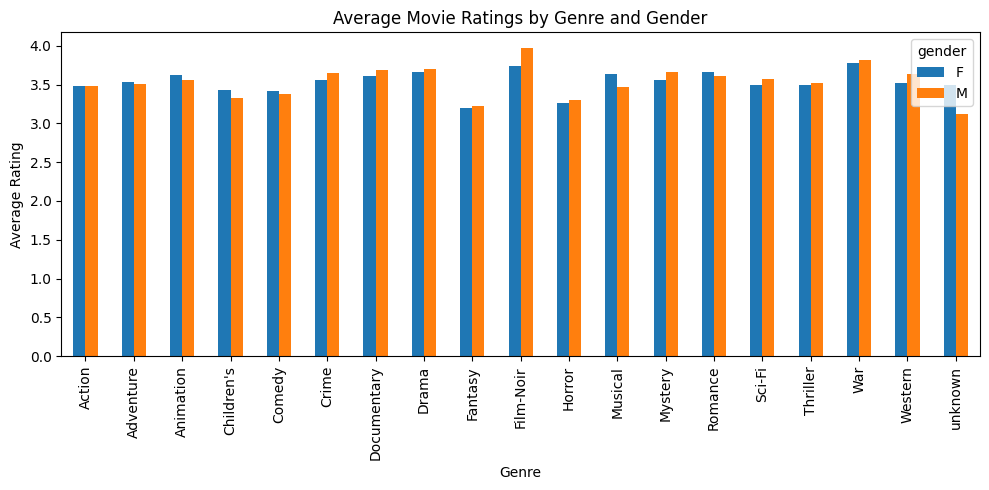

In [34]:
pivot_table[["F", "M"]].plot(kind="bar", figsize=(10, 5))

plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Genre and Gender")
plt.tight_layout()

plt.savefig("avg_ratings_by_genre_gender.png", dpi=300)
plt.show()


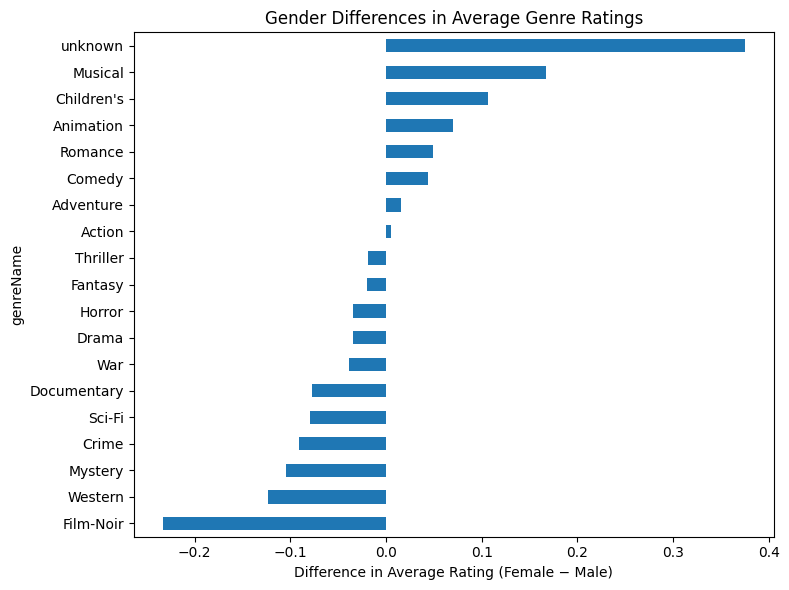

In [29]:
pivot_table["difference"] = pivot_table["F"] -pivot_table["M"]

pivot_table["difference"].sort_values().plot(kind="barh",figsize=(8, 6))

plt.xlabel("Difference in Average Rating (Female − Male)")
plt.title("Gender Differences in Average Genre Ratings")
plt.tight_layout()

plt.savefig("gender_rating_differences.png", dpi=300)
plt.show()


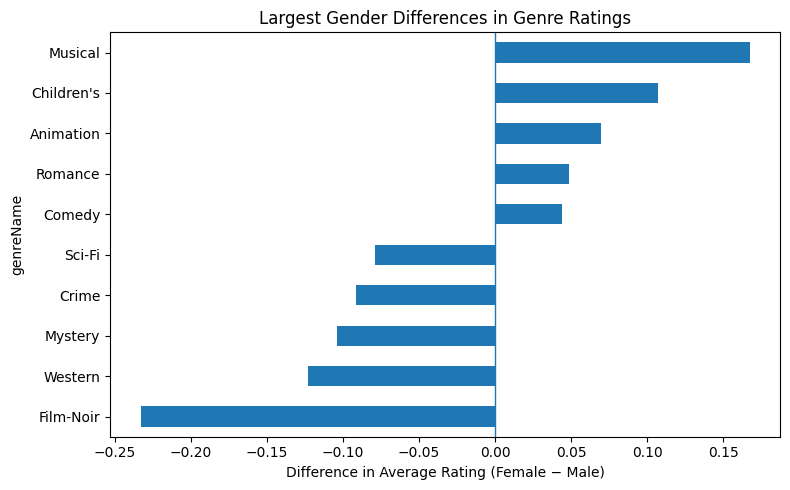

In [37]:
diff = pivot_filtered["difference"].sort_values()

top_bottom = pd.concat([diff.head(5),diff.tail(5)])

top_bottom.plot(kind="barh",figsize=(8, 5))

plt.axvline(0, linewidth=1)
plt.xlabel("Difference in Average Rating (Female − Male)")
plt.title("Largest Gender Differences in Genre Ratings")
plt.tight_layout()
plt.savefig("largest_gender_differences.png", dpi=300, bbox_inches="tight")
plt.show()
